In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaishnavialape","key":"1f05d7717b73ca2e3fe77eaed7b7638d"}'}

In [ ]:
pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ninadaithal/imagesoasis

Dataset URL: https://www.kaggle.com/datasets/ninadaithal/imagesoasis
License(s): Apache 2.0
 99% 1.22G/1.23G [00:20<00:00, 74.6MB/s]
100% 1.23G/1.23G [00:20<00:00, 64.8MB/s]


In [ ]:
! unzip -q "imagesoasis.zip" -d mri-data

In [ ]:
import numpy as np
import os
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
path1 = []
path2 = []
path3 = []
path4 = []
for dirname, _, filenames in os.walk('/content/mri-data/Data/Non Demented'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/mri-data/Data/Mild Dementia'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/mri-data/Data/Moderate Dementia'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/mri-data/Data/Very mild Dementia'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))

In [ ]:
path1 = path1[0:100]
path2 = path2[0:100]
path3 = path3[0:100]
path4 = path4[0:100]

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [ ]:
data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for path in path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

for path in path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for path in path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(400, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape((400,4))
result.shape

(400, 4)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=1,shuffle=True,random_state=42)

In [ ]:
num_train_images = x_train.shape[0]

# Number of test images
num_test_images = x_test.shape[0]

# Number of train labels (should be same as number of train images)
num_train_labels = y_train.shape[0]

# Number of test labels (should be same as number of test images)
num_test_labels = y_test.shape[0]

# Number of validation images (assuming the remaining images after train-test split are used for validation)
num_validation_images = data.shape[0] - num_train_images - num_test_images

print("Number of train images:", num_train_images)
print("Number of test images:", num_test_images)
print("Number of validation images:", num_validation_images)

Number of train images: 399
Number of test images: 1
Number of validation images: 0


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [ ]:
y_train.shape

(340, 4)

In [ ]:
x_train.shape

(340, 128, 128, 3)

In [ ]:
history = model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
34/34 [==============================] - 60s 2s/step - loss: 23.9371 - accuracy: 0.3588 - val_loss: 10.4233 - val_accuracy: 0.2500
Epoch 2/10
34/34 [==============================] - 50s 1s/step - loss: 3.2420 - accuracy: 0.5824 - val_loss: 2.4219 - val_accuracy: 0.3833
Epoch 3/10
34/34 [==============================] - 50s 1s/step - loss: 1.0002 - accuracy: 0.7000 - val_loss: 1.4142 - val_accuracy: 0.5500
Epoch 4/10
34/34 [==============================] - 52s 2s/step - loss: 0.8148 - accuracy: 0.7676 - val_loss: 1.4469 - val_accuracy: 0.5000
Epoch 5/10
34/34 [==============================] - 53s 2s/step - loss: 0.6633 - accuracy: 0.8000 - val_loss: 1.4941 - val_accuracy: 0.4833
Epoch 6/10
34/34 [==============================] - 61s 2s/step - loss: 0.4147 - accuracy: 0.8618 - val_loss: 1.8073 - val_accuracy: 0.5000
Epoch 7/10
34/34 [==============================] - 52s 2s/step - loss: 0.4740 - accuracy: 0.8412 - val_loss: 1.7561 - val_accuracy: 0.4500
Epoch 8/10
34/34 [

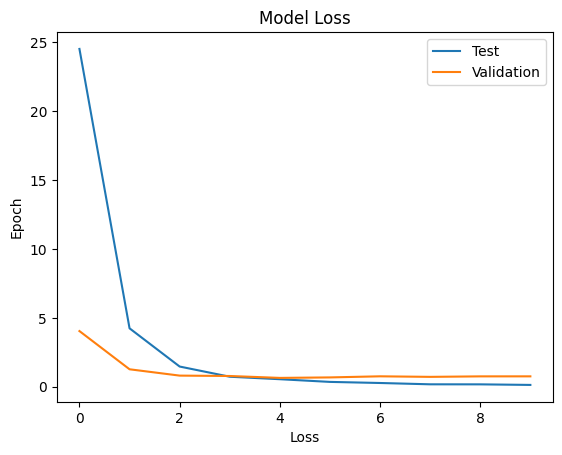

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

In [ ]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r'/content/mri-data/Data/Moderate Dementia/OAS1_0308_MR1_mpr-4_101.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

55.84245324134827% Confidence This Is Non Demented


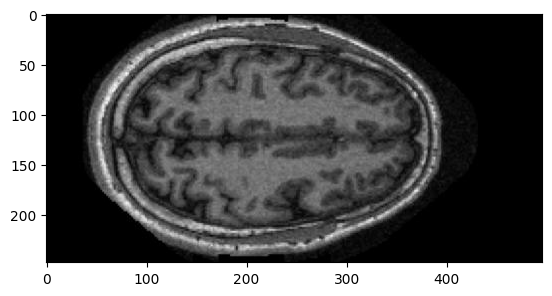

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r'/content/mri-data/Data/Non Demented/OAS1_0095_MR1_mpr-4_153.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

63.13137412071228% Confidence This Is Non Demented


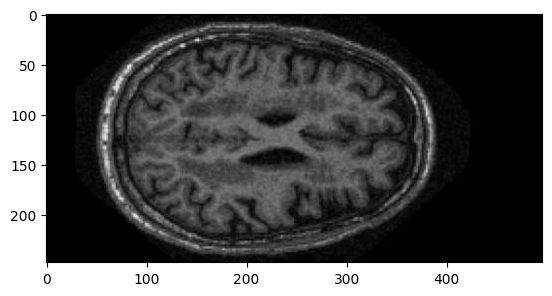

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r'/content/mri-data/Data/Very mild Dementia/OAS1_0016_MR1_mpr-1_160.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/My Drive/AlzhmCode.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
